<a href="https://colab.research.google.com/github/rafsanalhad/machine_learning_jobsheet/blob/main/Week7_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas
Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'

2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

3. Buatlah model K-Means dengan mempertimbangkan jumlah 'k' yang terbaik.

Buatlah implementasi model SOM untuk segmentasi citra lain

# Model K-Means

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

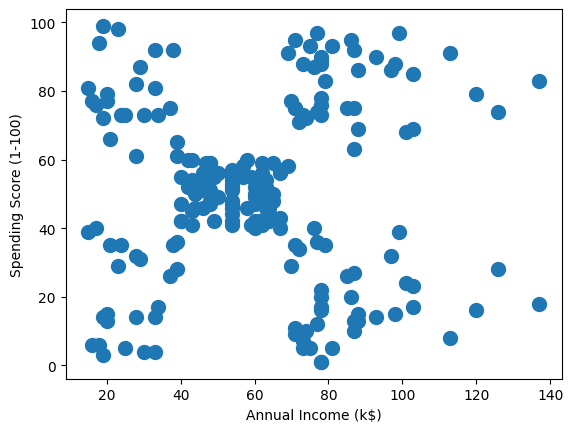

In [2]:

# Load dataset
df = pd.read_csv('/content/Mall_Customers.csv')

# Pilih fitur yang relevan
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Plot data untuk melihat distribusi awal
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


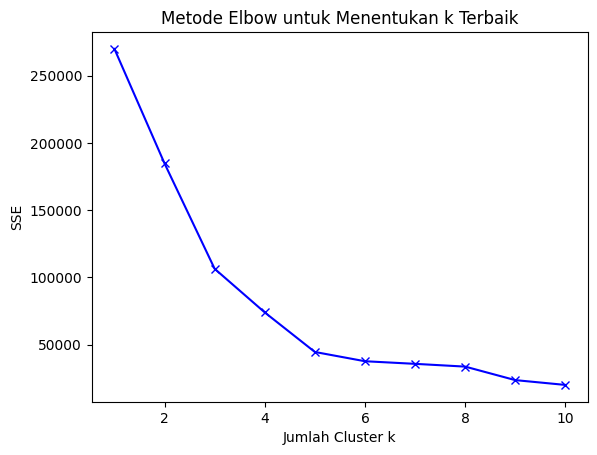

In [3]:
# Tentukan k terbaik menggunakan metode elbow
sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot elbow method
plt.plot(K, sse, 'bx-')
plt.xlabel('Jumlah Cluster k')
plt.ylabel('SSE')
plt.title('Metode Elbow untuk Menentukan k Terbaik')
plt.show()

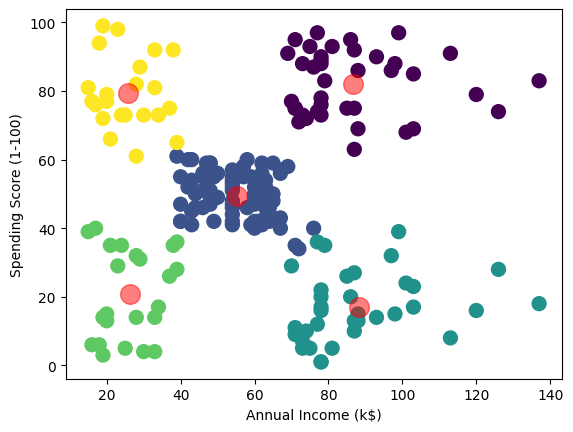

In [4]:
# Setelah menentukan k terbaik, buat model K-Means
k_optimal = 5  # Misalkan k=5
kmeans = KMeans(n_clusters=k_optimal)
y_kmeans = kmeans.fit_predict(X)

# Plot hasil clustering
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=100, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


# Implementasi SOM untuk Segmentasi Citra

In [6]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=e45fc054b4f7e723dd39cea6668ef72b1f87660d2080da600881130247663488
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


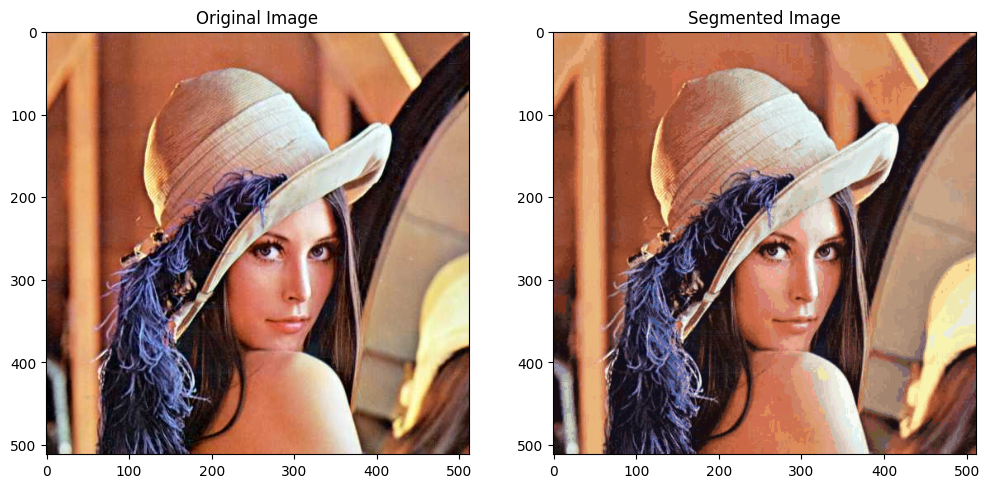

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from minisom import MiniSom


# Load citra baru
image_path = '/content/lena.jpg'
image = io.imread(image_path) / 255.0  # Normalisasi intensitas piksel

# Ubah data menjadi vektor 2D (lebar * tinggi, 3) untuk setiap piksel
data = image.reshape(-1, 3)

# Inisialisasi SOM
som = MiniSom(10, 10, 3, sigma=0.5, learning_rate=0.5)
som.random_weights_init(data)

# Latih SOM
som.train_random(data, 100)

# Dapatkan hasil segmentasi
segmented_image = np.zeros_like(data)
for i, pixel in enumerate(data):
    winner = som.winner(pixel)
    segmented_image[i] = som.get_weights()[winner]

# Ubah hasil segmentasi kembali menjadi citra
segmented_image = segmented_image.reshape(image.shape)

# Plot hasil segmentasi
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(segmented_image)
ax[1].set_title('Segmented Image')
plt.show()
